<a href="https://colab.research.google.com/github/Foysal348/Simulation-and-Modeling-For-Cake-Inventory-Shop/blob/main/Cake_Shop_Inventory_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cake Shop Inventory Simulation


## Business Context


**A cake shop:**

1.Bakes cakes daily

2.Faces random customer demand

3.Has perishable inventory (cakes waste after 1 day)

4.Wants to minimize waste, shortages, and cost

## Model Assumptions
1.Demand per day is random (IID)

2.Cakes unsold at end of day spoil

3.Replenishment is done daily (morning baking)

4.Shortages mean lost sales

5.Costs are fixed and known

===== CAKE SHOP INVENTORY RESULTS =====
Total Baking Cost   : 18000
Total Holding Cost  : 1463
Total Waste Cost    : 2696
Total Shortage Cost : 390
TOTAL COST          : 22549


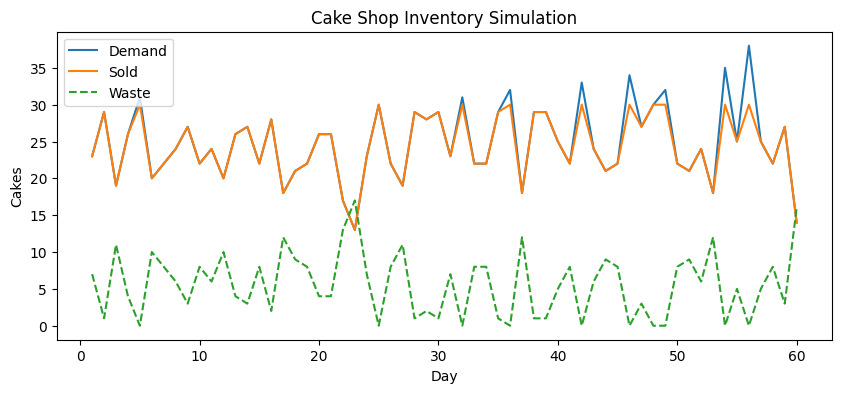

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# PARAMETERS
np.random.seed(42)

SIM_DAYS = 60
MEAN_DEMAND = 25       # average customers per day
BAKE_QTY = 30          # cakes baked daily

BAKING_COST = 100      # per cake
HOLDING_COST = 70      # per cake per day
WASTE_COST = 8         # Per waste (spoiled cake) cost
SHORTAGE_COST = 15     # lost sale cost


# METRICS
total_baking_cost = 0
total_holding_cost = 0
total_waste_cost = 0
total_shortage_cost = 0

inventory = 0
history = []


# SIMULATION
for day in range(1, SIM_DAYS + 1):

    # Morning baking
    inventory = BAKE_QTY
    total_baking_cost += BAKE_QTY * BAKING_COST

    # Daily demand (IID)
    demand = np.random.poisson(MEAN_DEMAND)

    # Sales
    sold = min(inventory, demand)
    shortage = max(demand - inventory, 0)
    waste = inventory - sold

    # Costs
    total_holding_cost += sold * HOLDING_COST
    total_waste_cost += waste * WASTE_COST
    total_shortage_cost += shortage * SHORTAGE_COST

    # End-of-day inventory (spoiled)
    inventory = 0

    # Store history
    history.append([day, demand, sold, shortage, waste])

# RESULTS
df = pd.DataFrame(
    history,
    columns=["Day", "Demand", "Sold", "Shortage", "Waste"]
)

print("===== CAKE SHOP INVENTORY RESULTS =====")
print(f"Total Baking Cost   : {total_baking_cost}")
print(f"Total Holding Cost  : {total_holding_cost}")
print(f"Total Waste Cost    : {total_waste_cost}")
print(f"Total Shortage Cost : {total_shortage_cost}")
print(f"TOTAL COST          : {total_baking_cost + total_holding_cost + total_waste_cost + total_shortage_cost}")

# PLOT
plt.figure(figsize=(10,4))
plt.plot(df["Day"], df["Demand"], label="Demand")
plt.plot(df["Day"], df["Sold"], label="Sold")
plt.plot(df["Day"], df["Waste"], label="Waste", linestyle="--")
plt.xlabel("Day")
plt.ylabel("Cakes")
plt.title("Cake Shop Inventory Simulation")
plt.legend()
plt.show()
